In [12]:
import warnings

warnings.filterwarnings(
    "ignore", category=RuntimeWarning, message="overflow encountered in exp"
)

In [13]:
import os

import matplotlib.pyplot as plt
import numpy as np
import torch
from infomeasure import entropy
from torchvision import datasets, transforms

print(f"PyTorch Version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

PyTorch Version: 2.9.1+cu126
CUDA available: True


In [4]:
# download mnist dataset to data directory

data_dir = os.path.join("../../../..", "data")
os.makedirs(data_dir, exist_ok=True)

transform = transforms.Compose([transforms.ToTensor()])
mnist_test = datasets.MNIST(
    root=data_dir, train=False, download=True, transform=transform
)


## Entropy of Estimation All MNIST Images


Total number of images in MNIST test set: 10000
Image shape: torch.Size([1, 28, 28])
Flattening all 10000 images...

Total number of pixels: 7840000
Pixel value range: [0, 255]
Unique pixel values: 256

Approach             | Entropy (bits)      
---------------------------------------------
Discrete (ML)        | 1.966714            
Miller-Madow         | 1.966738            
NSB                  | Error: NsbEntropyEstimator.__init__() got an unexpected keyword argument 'k'


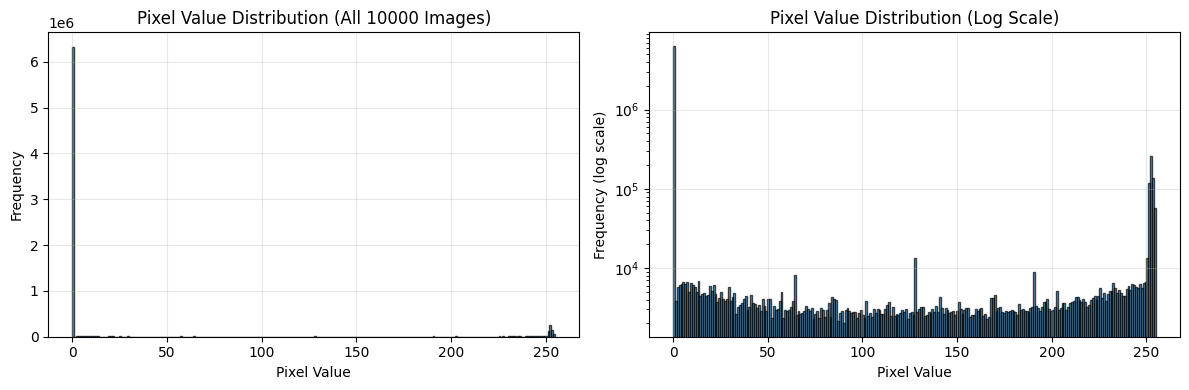

In [5]:
# flatten ALL MNIST test images into one array
print(f"Total number of images in MNIST test set: {len(mnist_test)}")
print(f"Image shape: {mnist_test[0][0].shape}")
print(f"Flattening all {len(mnist_test)} images...")

# collect all images
all_pixels = []
for i in range(len(mnist_test)):
    img_tensor, _ = mnist_test[i]
    # convert to 0-255 scale for discrete estimation
    img_np = (img_tensor.numpy().squeeze() * 255).astype(int)
    all_pixels.extend(img_np.flatten())

all_pixels = np.array(all_pixels)

print(f"\nTotal number of pixels: {len(all_pixels)}")
print(f"Pixel value range: [{all_pixels.min()}, {all_pixels.max()}]")
print(f"Unique pixel values: {len(np.unique(all_pixels))}")

# calculate entropy using different approaches
print(f"\n{'Approach':<20} | {'Entropy (bits)':<20}")
print("-" * 45)

# discrete entropy (maximum likelihood)
h_discrete = entropy(all_pixels, approach="discrete", base=2)
print(f"{'Discrete (ML)':<20} | {h_discrete:<20.6f}")

# Miller-Madow corrected entropy
h_mm = entropy(all_pixels, approach="miller_madow", base=2)
print(f"{'Miller-Madow':<20} | {h_mm:<20.6f}")

# NSB entropy estimator
try:
    h_nsb = entropy(all_pixels, approach="nsb", k=256, base=2)
    print(f"{'NSB':<20} | {h_nsb:<20.6f}")
except Exception as e:
    print(f"{'NSB':<20} | Error: {e}")

# show pixel value distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(all_pixels, bins=256, range=(0, 255), edgecolor="black", alpha=0.7)
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.title(f"Pixel Value Distribution (All {len(mnist_test)} Images)")
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(all_pixels, bins=256, range=(0, 255), edgecolor="black", alpha=0.7, log=True)
plt.xlabel("Pixel Value")
plt.ylabel("Frequency (log scale)")
plt.title("Pixel Value Distribution (Log Scale)")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Random Images Individually


pixels =  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  78 158 253 210  83   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0 131 243 253 252 252 246  90   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  18 213 252 240 125 217 252 197   0 

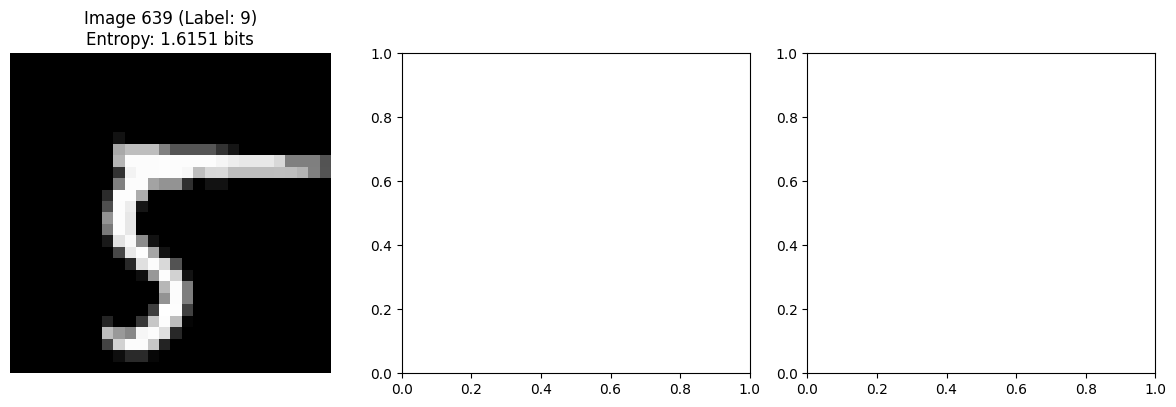


Image Index     | Label      | Entropy (bits) 
---------------------------------------------
639             | 9          | 1.615125       


In [11]:
np.random.seed(42)
random_indices = np.random.choice(len(mnist_test), 1, replace=False)
random_indices = [639]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for idx, img_idx in enumerate(random_indices):
    img_tensor, label = mnist_test[img_idx]

    # print(img_tensor)
    # img_np = (img_tensor.numpy().squeeze() * 255).astype(int)
    # pixels = img_np.flatten()
    # print("img_np = ", img_np, img_np.shape)

    pixels = (img_tensor.numpy().squeeze() * 255).astype(int).flatten()
    print("pixels = ", pixels, pixels.shape)

    # calculate entropy
    h_discrete = entropy(pixels, approach="discrete", base=2)

    # display image
    axes[idx].imshow(img_np, cmap="gray")
    axes[idx].set_title(
        f"Image {img_idx} (Label: {label})\nEntropy: {h_discrete:.4f} bits"
    )
    axes[idx].axis("off")

plt.tight_layout()
plt.show()

# print detailed entropy values
print(f"\n{'Image Index':<15} | {'Label':<10} | {'Entropy (bits)':<15}")
print("-" * 45)
for img_idx in random_indices:
    img_tensor, label = mnist_test[img_idx]
    img_np = (img_tensor.numpy().squeeze() * 255).astype(int)
    pixels = img_np.flatten()
    h = entropy(pixels, approach="discrete", base=2)
    print(f"{img_idx:<15} | {label:<10} | {h:<15.6f}")
